In [28]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)
import numpy as np
import sympy as sp
# import scipy as sp
import latexify

In [29]:
@latexify.function
def ekv(VG, Is, Vth0, k, theta, W, L):
        VT = 0.0258
        return Is*(W/L)*(1/(1+theta*k*(VG-Vth0)))*(np.log(1 + np.exp(k * (VG - Vth0) / (2 * VT))))**2

ekv

In [30]:
Is, W, L, Vth0, k, theta, VG, VT = sp.symbols('Is W L Vth0 k theta VG, VT')
Id = Is*(W/L)*(1/(1+theta*k*(VG-Vth0)))*(sp.log(1 + sp.exp(k * (VG - Vth0) / (2 * VT))))**2

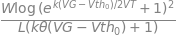

In [31]:
dekv_dIs = sp.diff(Id, Is)
dekv_dIs

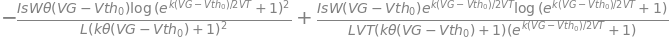

In [32]:
dekv_dk = sp.diff(Id, k)
dekv_dk

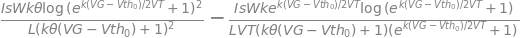

In [33]:
dekv_dVth0 = sp.diff(Id, Vth0)
dekv_dVth0

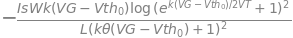

In [34]:
dekv_dtheta = sp.diff(Id, theta)
dekv_dtheta

In [35]:
Is, W, L, Vth0, k, theta, VG, VT = sp.symbols('Is W L Vth0 k theta VG, VT')
Id_ekv_4param = Is*(W/L)*(1/(1+theta*k*(VG-Vth0)))*(sp.log(1 + sp.exp(k * (VG - Vth0) / (2 * VT))))**2


dekv_dIs_sym = sp.diff(Id_ekv_4param, Is)
dekv_dk_sym = sp.diff(Id_ekv_4param, k)
dekv_dVth0_sym = sp.diff(Id_ekv_4param, Vth0)
dekv_dtheta_sym = sp.diff(Id_ekv_4param, theta)

dekv_dIs = sp.lambdify((VG, W, L, VT, Is, Vth0, k, theta), dekv_dIs_sym, 'numpy')
dekv_dk = sp.lambdify((VG, W, L, VT, Is, Vth0, k, theta), dekv_dk_sym, 'numpy')
dekv_dVth0 = sp.lambdify((VG, W, L, VT, Is, Vth0, k, theta), dekv_dVth0_sym, 'numpy')
dekv_dtheta = sp.lambdify((VG, W, L, VT, Is, Vth0, k, theta), dekv_dtheta_sym, 'numpy')

In [36]:
def ekv_4param(VG, *params, W, L):
        Is, Vth0, kappa, theta = params
        return Is*(W/L)/(1+theta*kappa*(VG-Vth0))*(np.log(1 + np.exp(kappa * (VG - Vth0) / (2 * 0.0258)))**2)

ekv = ekv_4param
print(ekv(1, *[1, 1, 1, 1], W=1, L=1))

0.4804530139182014
